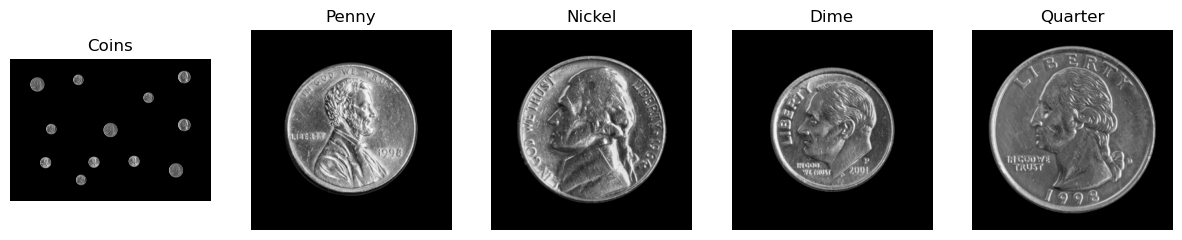

(2480, 3508) (300, 300)


In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

# Load images of the coins
coins_img = cv.imread('coins.png', cv.IMREAD_GRAYSCALE)
assert coins_img is not None

penny_img = cv.imread('Penny.png', cv.IMREAD_GRAYSCALE)
assert penny_img is not None

nickel_img = cv.imread('Nickel.png', cv.IMREAD_GRAYSCALE)
assert nickel_img is not None

dime_img = cv.imread('Dime.png', cv.IMREAD_GRAYSCALE)
assert dime_img is not None

quarter_img = cv.imread('Quarter.png', cv.IMREAD_GRAYSCALE)
assert quarter_img is not None

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(coins_img, cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(penny_img, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(nickel_img, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(dime_img, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(quarter_img, cmap='gray')
plt.title('Quarter')
plt.axis('off')
plt.show()

print(coins_img.shape, penny_img.shape)

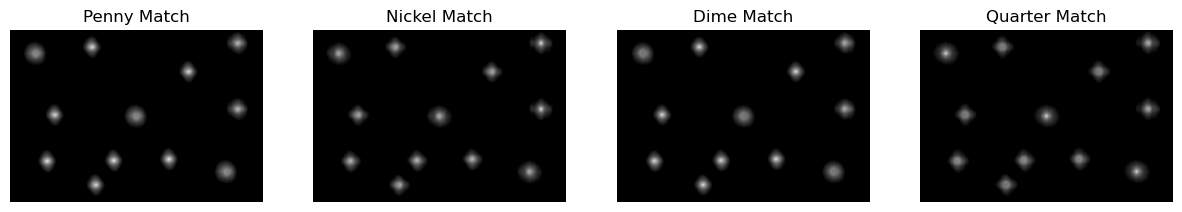

In [3]:
# Perform template matching
# We use normalized cross correlation coefficient
penny_match = cv.matchTemplate(coins_img, penny_img, cv.TM_CCOEFF_NORMED)
nickel_match = cv.matchTemplate(coins_img, nickel_img, cv.TM_CCOEFF_NORMED)
dime_match = cv.matchTemplate(coins_img, dime_img, cv.TM_CCOEFF_NORMED)
quarter_match = cv.matchTemplate(coins_img, quarter_img, cv.TM_CCOEFF_NORMED)

# Display the template matching results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(penny_match, cmap='gray', vmin=0, vmax=1)
plt.title('Penny Match')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(nickel_match, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel Match')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dime_match, cmap='gray', vmin=0, vmax=1)
plt.title('Dime Match')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(quarter_match, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter Match')
plt.axis('off')
plt.show()

In [11]:
# stack the responses vertically
stacked_response = np.stack(arrays=[penny_match, nickel_match, dime_match, quarter_match], axis=2)

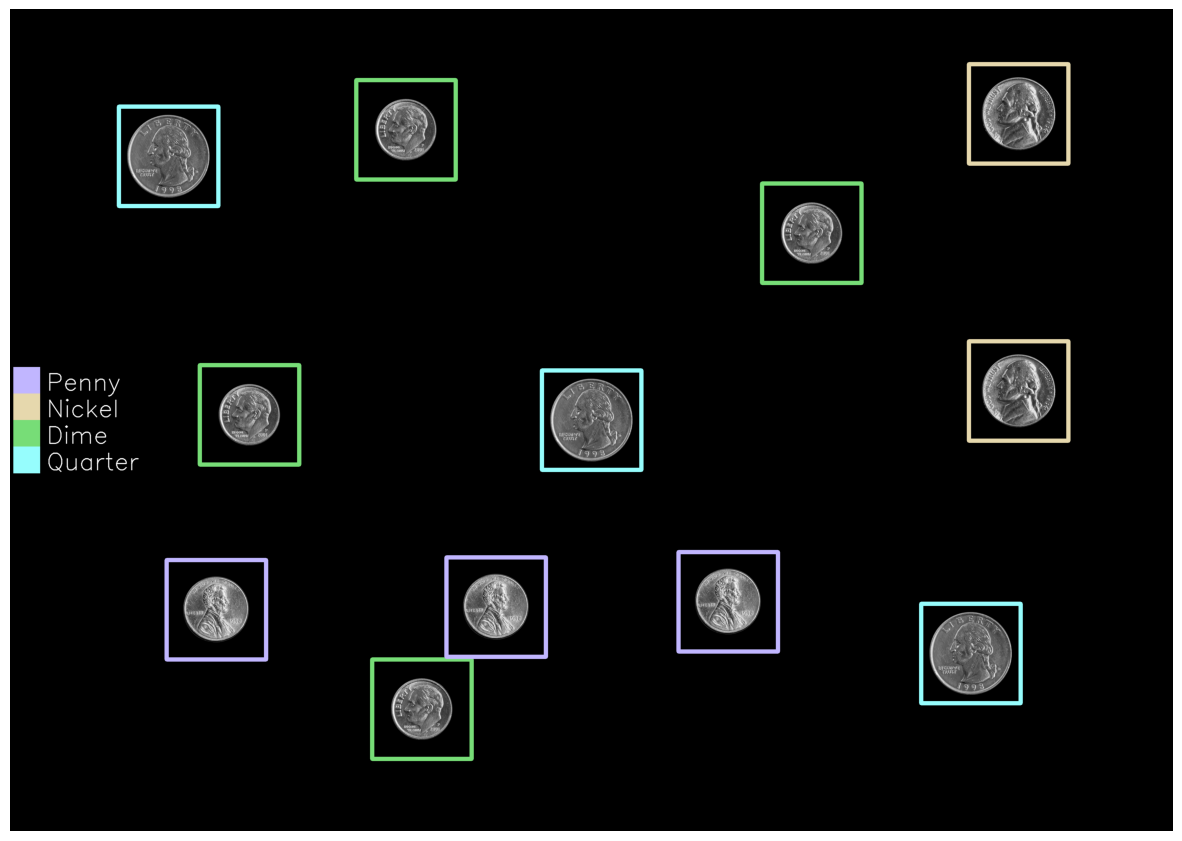

In [18]:
# define a color image and draw the boxes
# define the pastel colors
pastel_colors = [
  (255, 182, 193), 
  (173, 216, 230),  
  (119, 221, 119), 
  (253, 253, 150)  
]

# Convert the coins image to color to draw on it
coins_colored = cv.cvtColor(coins_img, cv.COLOR_GRAY2BGR)

# Find the local maxima in the stacked responses
coordinates = peak_local_max(stacked_response, exclude_border=0, min_distance=5, threshold_abs=0.9)

# Define coin names for the legend
template_names = ["Penny", "Nickel", "Dime", "Quarter"]

# Dictionary to count the number of each coin
coin_counts = {name: 0 for name in template_names}

# Draw rectangles around detected coins
for coord in coordinates:
    y, x, c = coord
    coin_counts[template_names[c]]+=1
    template_shape = [penny_img.shape, nickel_img.shape, dime_img.shape, quarter_img.shape][c]
    cv.rectangle(coins_colored, (x, y), (x + template_shape[1], y + template_shape[0]), pastel_colors[c], thickness=12)


# Define the size and the dimensions of the legend
legend_scale = 0.8
rectangle_size = 100  # Width and height of the rectangles in pixels

legend_height = int(len(template_names) * rectangle_size * legend_scale)
start_y = (coins_colored.shape[0] - legend_height) // 2

# Draw the legend
for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    scaled_font_scale = legend_scale * 3  # Adjust font scale based on legend scale
    
    # Calculate rectangle coordinates
    rect_top_left = (10, start_y + int(rectangle_size * legend_scale * i))
    rect_bottom_right = (10 + int(rectangle_size * legend_scale), start_y + int(rectangle_size * legend_scale + rectangle_size * legend_scale * i))
    
    # Draw rectangle
    cv.rectangle(coins_colored, rect_top_left, rect_bottom_right, color=color, thickness=-1)
    
    # Calculate text position
    text_x = 30 + int(rectangle_size * legend_scale)
    text_y = start_y + int(rectangle_size * legend_scale + 0.5 * rectangle_size * legend_scale * (2 * i + 1)) - int(rectangle_size / 2)
    
    # Draw text
    cv.putText(coins_colored, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)

# Display the final image with detected coins and legend
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(coins_colored, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [19]:
# Print the number of each coin type
for name, count in coin_counts.items():
    print(f"{name}: {count}")

Penny: 3
Nickel: 2
Dime: 4
Quarter: 3
